# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [140]:
#step 1
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
## step 2
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#step 3
users = pd.read_csv(url, delimiter='|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [144]:
# step 4
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [146]:
# step 5
# Convert gender to a numerical value where Male=1 and Female=0
users['gender_num'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)

male_ratio_per_occupation = users.groupby('occupation')['gender_num'].mean()
sorted_male_ratio = male_ratio_per_occupation.sort_values(ascending=False)
print(sorted_male_ratio)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_num, dtype: float64


In [148]:
# step 6
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [150]:
# step 7
mean_age_per_occ_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occ_sex)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [152]:
## step 8
gender_counts = users.groupby(['occupation', 'gender']).size().unstack()
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
print(gender_percentage)


gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [155]:
# step1 
import pandas as pd

#step 2 and 3
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

# step 4
goals = euro12[['Goals']]
goals

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [157]:
# step 5
num_teams = euro12['Team'].nunique()
print(f"Number of teams that participated: {num_teams}")


Number of teams that participated: 16


In [159]:
# step 6
num_columns = euro12.shape[1]
print(f"Number of columns in the dataset: {num_columns}")


Number of columns in the dataset: 35


In [161]:
# step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [163]:
# step 8
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_teams)


                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [165]:
# step 9
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f"Mean Yellow Cards per team: {mean_yellow_cards}")


Mean Yellow Cards per team: 7.4375


In [167]:
# step 10
euro12[['Team','Goals']].loc[euro12['Goals'] > 6 ]

,Team,Goals
5,Germany,10
13,Spain,12


In [169]:
# step 11
euro12[euro12['Team'].str.startswith('G')]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [250]:
# step 12
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [252]:
# step 13
all_but_last_3_columns = euro12.iloc[:, :-3]
print(all_but_last_3_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [254]:
# step 14
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [256]:
# step 1
import pandas as pd
import numpy as np

# step2 
series1 = pd.Series(np.random.randint(1, 5, size=100), name = 'col1')

series2 = pd.Series(np.random.randint(1, 4, size=100), name = 'col2')

series3 = pd.Series(np.random.randint(10000, 30001, size=100), name = 'col3')


# step 3

df = pd.concat([series1, series2, series3], axis=1)

df



,col1,col2,col3
0,2,3,18010
1,2,3,23537
2,1,1,28347
3,1,3,15763
4,2,2,29340
...,...,...,...
95,4,2,21100
96,1,1,18526
97,4,1,18292
98,1,3,28847


In [260]:
# step 4
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df


,bedrs,bathrs,price_sqr_meter
0,2,3,18010
1,2,3,23537
2,1,1,28347
3,1,3,15763
4,2,2,29340
...,...,...,...
95,4,2,21100
96,1,1,18526
97,4,1,18292
98,1,3,28847


In [262]:
# step 5
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print(bigcolumn_df.head(110))  # Display the first 110 rows to check


     bigcolumn
0            2
1            2
2            1
3            1
4            2
..         ...
105          2
106          3
107          2
108          3
109          3

[110 rows x 1 columns]


In [264]:
# step 6
print(bigcolumn_df.index.max())  # This should show the maximum index value


299


In [266]:
# step 7
bigcolumn_df.index = range(300)
print(bigcolumn_df)


     bigcolumn
0            2
1            2
2            1
3            1
4            2
..         ...
295      21100
296      18526
297      18292
298      28847
299      20461

[300 rows x 1 columns]


# Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
                                                                     
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks

In [270]:
# step 1
import pandas as pd



# step 2
data = pd.read_csv('wind.txt', delimiter='\s+')

# step 3
data.rename(columns={"Yr":"Year", "Mo":"Month", "Dy":"Day"}, inplace=True)

data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [274]:
# step 4
def Year():
    data['Year'] += 1900 #

Year() # Fix year by converting it in 4-digit value

data


,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [276]:
# step 5

data.index = pd.to_datetime(pd.concat([data['Year'], data['Month'], data['Day']], axis=1))
data.drop(['Year','Month','Day'], axis=1, inplace=True)
data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [278]:
# step 6 for each
data.isna().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [280]:
# entire record
data.isnull().sum().sum()

31

In [282]:
# step 7 computing missing values
data.notnull().sum().sum()

78857

In [286]:
# step 8

data.mean().mean()


10.227982360836938

In [288]:
# step 9

loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis=1) 
loc_stats.rename(columns={0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace=True) 

loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [290]:
# step 10

days = pd.concat([data.min(axis=1), data.max(axis=1), data.mean(axis=1), data.std(axis=1)], axis=1)
days.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'}, inplace=True)
days

,Min,Max,Mean,Std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [292]:
# step 11

wind_jan = data[data.index.month == 1].mean()
wind_jan

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [294]:
# step 12

yearly = data.resample('Y').ffill()

yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41
1970-12-31,8.38,0.37,9.59,2.62,1.75,0.08,4.83,2.13,2.54,1.17,3.67,7.21


In [296]:
# step 13

monthly = data.resample('M').ffill()

monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67
1978-11-30,15.34,4.54,14.75,3.50,4.54,4.96,7.50,2.42,4.96,3.75,4.92,11.50


In [298]:
## step 14 
weekly = data.resample('W').ffill()

weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08
1978-12-24,8.67,5.63,12.12,4.79,5.09,5.91,12.25,9.25,10.83,11.71,11.92,31.71


In [300]:
# step 15
weekly_stats = weekly[:52]

weekly_stats = pd.concat([weekly_stats.mean(), weekly_stats.max(), weekly_stats.mean(), weekly_stats.std()], axis=1)
weekly_stats.rename(columns={0:'Mean',1:'Max',2:'Mean',3:'Std'},inplace=True)

weekly_stats

,Mean,Max,Mean,Std
RPT,12.140000,25.80,12.140000,5.360926
VAL,10.626538,23.91,10.626538,4.782553
ROS,11.261731,22.42,11.261731,4.714533
KIL,6.862549,17.54,6.862549,3.743912
SHA,11.242745,24.08,11.242745,4.770084
BIR,7.946346,19.70,7.946346,3.906412
DUB,9.912353,22.00,9.912353,4.695142
CLA,9.305385,20.25,9.305385,4.022109
MUL,8.823077,21.46,8.823077,4.181664
CLO,9.939615,20.04,9.939615,4.077699


# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?
Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!
Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [184]:
## step 1
import pandas as pd

# step 2 and 3

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [186]:
#step 4
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [188]:
#step 5
num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")



Number of observations: 4622


In [190]:
#step 6
num_columns = chipo.shape[1]
print(f"Number of columns: {num_columns}")


Number of columns: 5


In [192]:
#step 7
print("Column names:", chipo.columns.tolist())


Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [194]:
#step 8
print("Index of the dataset:", chipo.index)


Index of the dataset: RangeIndex(start=0, stop=4622, step=1)


In [196]:
#step 9
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"Most ordered item: {most_ordered_item}")


Most ordered item: Chicken Bowl


In [198]:
#step 10
most_ordered_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Total number of {most_ordered_item} ordered: {most_ordered_count}")


Total number of Chicken Bowl ordered: 761


In [200]:
#step 11
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print(f"Most ordered item in choice description: {most_ordered_choice}")


Most ordered item in choice description: [Diet Coke]


In [202]:
#step 12
total_items_ordered = chipo['quantity'].sum()
print(f"Total number of items ordered: {total_items_ordered}")


Total number of items ordered: 4972


In [204]:
#step 13
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Check the item price type
print(chipo['item_price'].dtype)


float64


In [206]:
#step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Total revenue: ${revenue}")


Total revenue: $39237.02


In [208]:
#step 15
total_orders = chipo['order_id'].nunique()
print(f"Total number of orders: {total_orders}")


Total number of orders: 1834


In [210]:
#step 16
average_revenue_per_order = revenue / total_orders
print(f"Average revenue per order: ${average_revenue_per_order:.2f}")


Average revenue per order: $21.39


In [212]:
#step 17
unique_items = chipo['item_name'].nunique()
print(f"Number of different items sold: {unique_items}")


Number of different items sold: 50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


<Figure size 640x480 with 0 Axes>

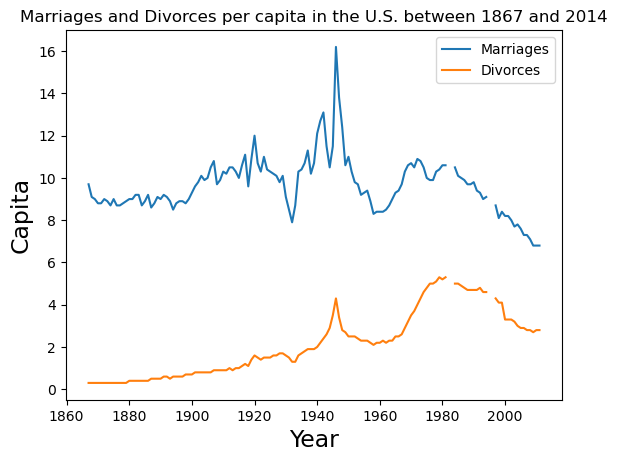

In [224]:
fig = plt.figure()
data.plot( 'Year', ['Marriages_per_1000','Divorces_per_1000'], label=['Marriages', 'Divorces'])
plt.title('Marriages and Divorces per capita in the U.S. between 1867 and 2014', color = 'k')
plt.xlabel('Year', color = 'k', fontsize = 17)
plt.ylabel('Capita', color = 'k', fontsize = 17)

plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

In [306]:
# Example DataFrame
data = pd.DataFrame({
    'Year': [1900, 1950, 2000],
    'Marriages_per_capita': [10, 12, 8],  # Example values
    'Divorces_per_capita': [1, 5, 7]      # Example values
})

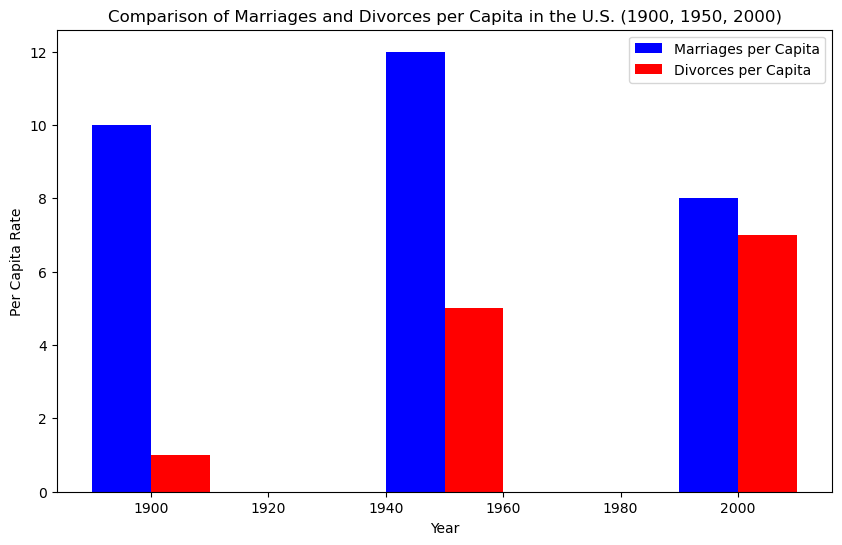

In [308]:
plt.figure(figsize=(10, 6))

# Create bars for marriages per capita
plt.bar(data['Year'] - 5, data['Marriages_per_capita'], width=10, label='Marriages per Capita', color='blue')

# Create bars for divorces per capita
plt.bar(data['Year'] + 5, data['Divorces_per_capita'], width=10, label='Divorces per Capita', color='red')

# Labeling the axes
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Adding the legend
plt.legend()

# Display the plot
plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes

Text(0, 0.5, 'Actor')

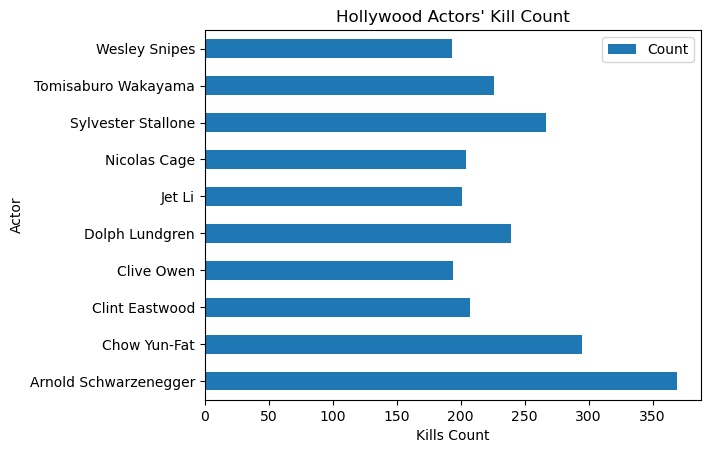

In [244]:
data = pd.read_csv('actor_kill_counts.csv')
data.plot.barh(x='Actor', y='Count')
plt.title('Hollywood Actors\' Kill Count')
plt.xlabel('Kills Count', color = 'k')
plt.ylabel('Actor', color = 'k')

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated 
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

Text(0.5, 1.0, "Roman Emperors' Cause of Death")

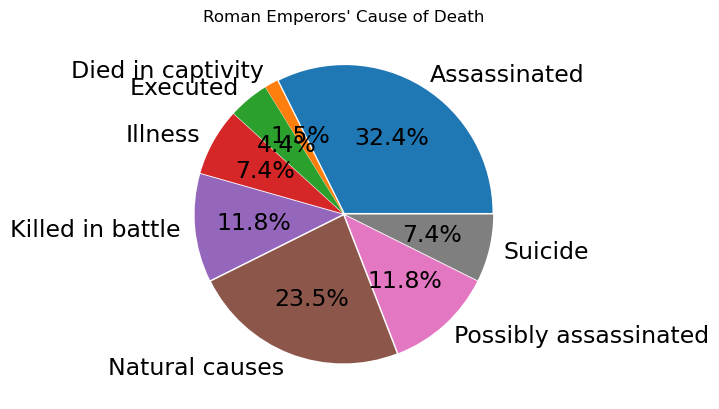

In [246]:
df = pd.read_csv('roman-emperor-reigns.csv')
death_cause = df.groupby("Cause_of_Death")['Emperor'].count()
death_cause.plot.pie(autopct="%.1f%%", fontsize =17, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperors' Cause of Death")

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0, 0.5, 'CS Doctorates Awarded')

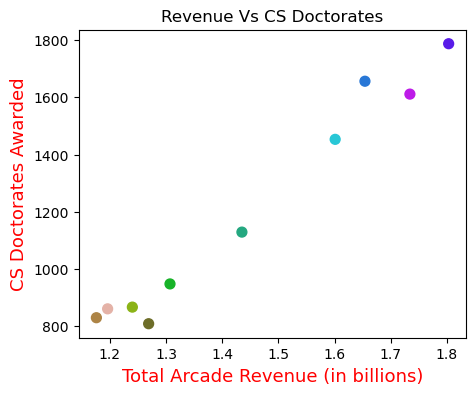

In [248]:
revenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
colors = ['#E4B2A7','#AD8446','#6D6D28','#8BB317','#17B328','#24A880','#28C7D6','#2877D6','#591BE8','#BD1BE8']
revenue.plot.scatter(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', c=colors , s = 50, figsize = (5,4))

plt.title('Revenue Vs CS Doctorates')
plt.xlabel('Total Arcade Revenue (in billions)' , color = 'Red', fontsize = 13)
plt.ylabel('CS Doctorates Awarded', color = 'Red', fontsize = 13)